In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation

In [2]:
observation =1000

xs = np.random.uniform(-10,10,(observation,1))
zs = np.random.uniform(-10,10,(observation,1))

generated_inputs =np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observation,1))
generated_targets = 12*xs + 13*zs -34 +noise

np.savez('tf-intro', inputs =generated_inputs, targets=generated_targets)

##  Solving with tensorflow

###  Loading the data

In [3]:
training_data = np.load('tf-intro.npz')



###  Defining the size of the input and output

In [4]:
input_size =2
output_size = 1

###  Building the model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                         ) # Perform the maths of the dot product of the inputs and weights and adds the bias
])



##  Compiling the model and adding optomizers and loss  functions

In [6]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'], epochs = 150, verbose=0)

##  Getting weights and biases

In [7]:
model.layers[0].get_weights()

[array([[11.991411 ],
        [13.0368595]], dtype=float32),
 array([-33.970993], dtype=float32)]

In [8]:
weights = model.layers[0].get_weights()[0]
weights

array([[11.991411 ],
       [13.0368595]], dtype=float32)

In [9]:
biases =model.layers[0].get_weights()[1]
biases

array([-33.970993], dtype=float32)

##  Predicting values

In [10]:
pred_targets = model.predict_on_batch(training_data['inputs'])
pred_targets

array([[ 9.25953522e+01],
       [-1.80557373e+02],
       [-2.24795639e+02],
       [ 2.14743347e+01],
       [-5.29744415e+01],
       [-1.30010834e+02],
       [ 7.97580872e+01],
       [-3.97491226e+01],
       [-4.62947350e+01],
       [-2.04895477e+01],
       [ 1.46015823e+02],
       [ 6.25774155e+01],
       [-1.13586075e+02],
       [-7.62356720e+01],
       [-9.34948196e+01],
       [-2.00546005e+02],
       [-1.10401230e+02],
       [ 1.24822495e+02],
       [-7.96462402e+01],
       [-1.21859177e+02],
       [-5.95834465e+01],
       [ 7.56440964e+01],
       [-9.00751877e+01],
       [-1.81789032e+02],
       [ 1.52013931e+02],
       [ 6.70725021e+01],
       [ 7.10616531e+01],
       [-1.49989319e+00],
       [ 1.07308121e+01],
       [-1.23713867e+02],
       [-6.13278732e+01],
       [ 1.85693893e+01],
       [-7.06254196e+00],
       [-4.18069801e+01],
       [-1.57147949e+02],
       [ 2.61977615e+01],
       [ 2.53710403e+01],
       [-9.88885956e+01],
       [ 4.5

## Plotting for the 45 degrees line

Text(0, 0.5, 'Actual Targets')

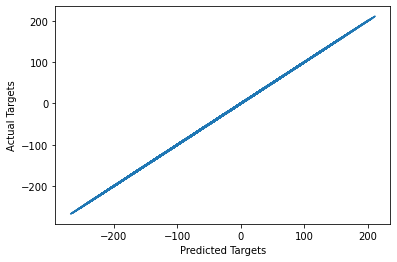

In [11]:
plt.plot(np.squeeze(pred_targets),np.squeeze(training_data['targets']))
plt.xlabel('Predicted Targets')
plt.ylabel('Actual Targets')